In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import keras

In [15]:
# libraries to import the .mat files
import scipy.io as sio
import h5py

In [16]:
# importing os to get the current directory
import os

In [17]:
# Define the directory where the data is located
data_dir = 'data'

# Get a list of all subdirectories in the data directory that start with 'brainTumorDataPublic_'
data_dirs = [f for f in os.listdir(data_dir) if f.startswith('brainTumorDataPublic_') and os.path.isdir(os.path.join(data_dir, f))]

# Initialize an empty list to store the data
data = {}
counter = 0
dir_counter = 0

# Loop over each subdirectory
for d in data_dirs:

    data[dir_counter] = []

    # Get a list of all .mat files in the subdirectory
    files = [f for f in os.listdir(os.path.join(data_dir, d)) if f.endswith('.mat')]
    
    # Load each .mat file and append it to the data list
    for f in files:
        with h5py.File(os.path.join(data_dir, d, f), 'r') as file:
            # Access the 'cjdata' group
            cjdata = file['cjdata']

            # Initialize an empty dictionary to store the data from this file
            file_data = {}
            
            # Convert the data to a numpy array and append it to the data list
            for name in cjdata:
                # Add the member to the dictionary
                file_data[name] = np.array(cjdata[name])
            # Append the dictionary to the data list
            data[dir_counter].append(file_data)

            # Increment the counter
            counter += 1
            # print the PID and label
            # print(f'Counter: {counter}')
    dir_counter += 1
            

In [ ]:
# Print the labels of the first sample
print(f'Labels: {data[0][0].keys()}')

# Print the number of samples
print(f'Number of samples: {len(data)}')

Labels: dict_keys(['PID', 'image', 'label', 'tumorBorder', 'tumorMask'])
Number of samples: 3064


In [ ]:
# for the first 3 samples, print the keys and the shape of the data
for i in range(3):
    print(f'Sample {i}:')
    for key in data[0][i]:
        print(f'  {key}: {data[0][i][key].shape}')

Sample 0:
  PID: (6, 1)
  image: (512, 512)
  label: (1, 1)
  tumorBorder: (1, 24)
  tumorMask: (512, 512)
Sample 1:
  PID: (6, 1)
  image: (512, 512)
  label: (1, 1)
  tumorBorder: (1, 26)
  tumorMask: (512, 512)
Sample 2:
  PID: (6, 1)
  image: (512, 512)
  label: (1, 1)
  tumorBorder: (1, 30)
  tumorMask: (512, 512)


Sample 0:


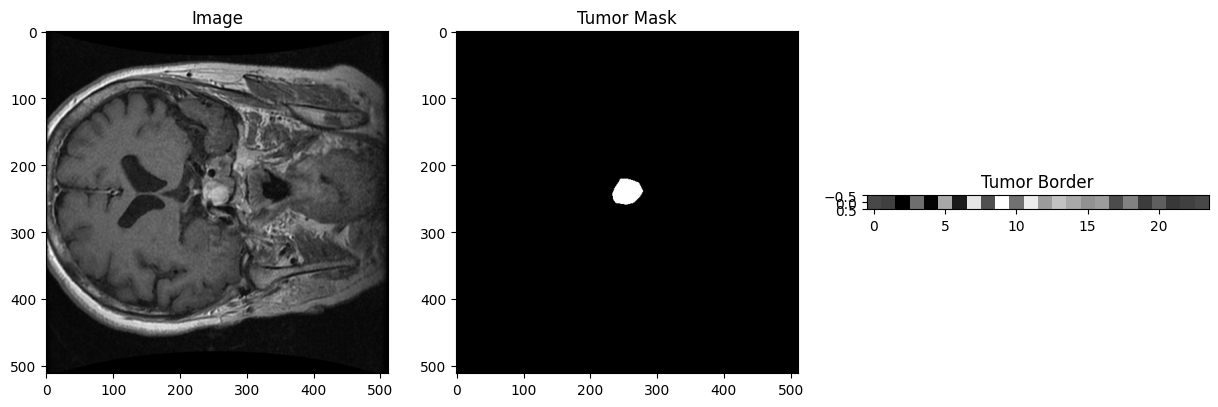

Sample 1:


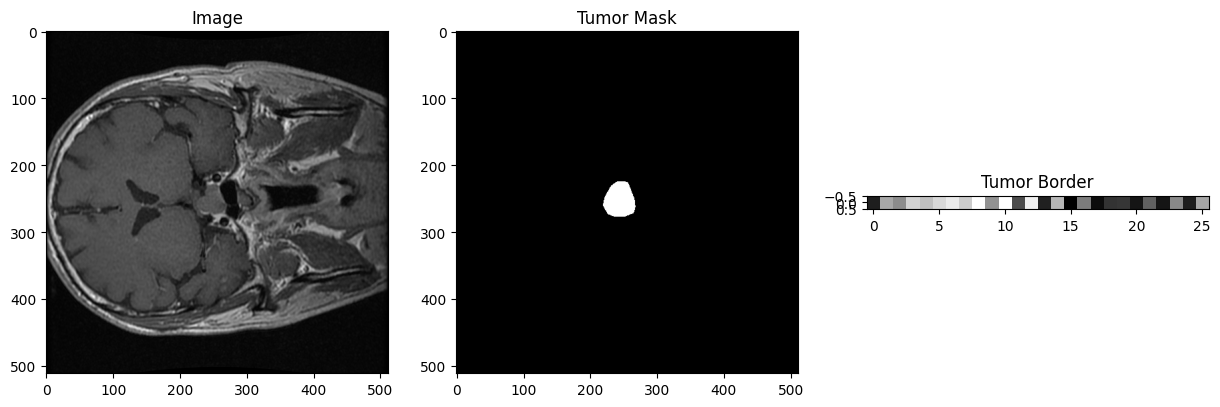

Sample 2:


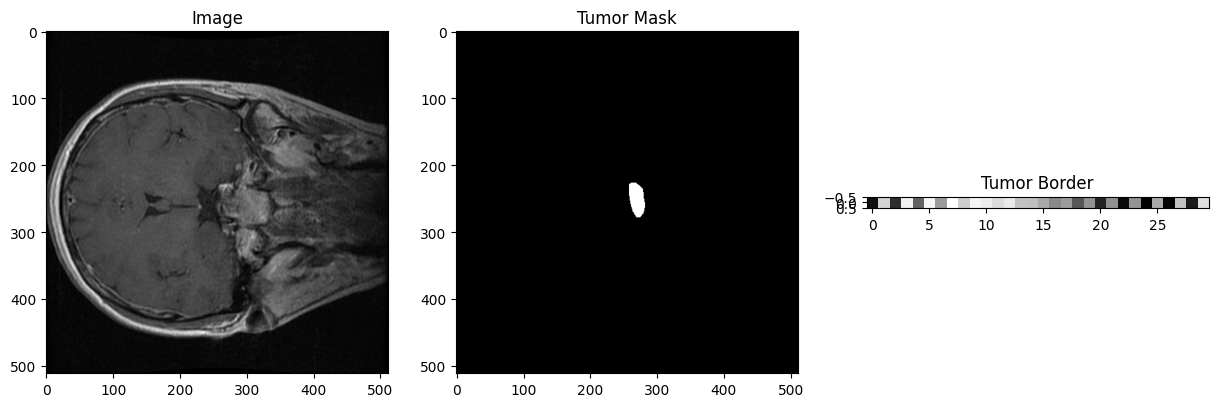

In [ ]:
# for the first 3 samples, print the image (which is a 512 by 512 matrix), the tumorBorder (1, 30), and the tumorMask (512, 512)
for i in range(3):
    print(f'Sample {i}:')
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(data[i]['image'], cmap='gray')
    ax[0].set_title('Image')
    ax[1].imshow(data[i]['tumorMask'], cmap='gray')
    ax[1].set_title('Tumor Mask')
    ax[2].imshow(data[i]['tumorBorder'], cmap='gray')
    ax[2].set_title('Tumor Border')
    plt.show()